In [0]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Neural network architectures
In this exercise you will modify the CNN and a Multilayer Perceptron architectures and evaluate and compare their performance. Run the cell below to load the libraries and to define the plotting function. 


In [0]:
from torch import optim
from trainers import PyTorchTrainer
from networks import *
from torchvision import transforms
from fashionmnist_utils.mnist_reader import load_mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the 'models' folder
os.makedirs("models", exist_ok=True)
# Create the 'runs' folder
os.makedirs("runs", exist_ok=True)

## TensorBoard
[TensorBoard](https://www.tensorflow.org/tensorboard)
 is a tool for monitoring neural network training progress. Although TensorBoard was created for TensorFlow (Google's framework for neural networks), it can also be used for Pytorch. You will use it in this exercise to evaluate model training.
In a terminal window (after activating the `iml`
 environment) execute:
```python3
pip install torch torchvision
pip install --user tensorboard


```
<article class="message task"><a class="anchor" id="setup11"></a>
    <div class="message-header">
        <span>Task 1: TensorBoard</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Navigate to the exercise source folder.

2. Start `tensorboard`
 from the terminal by typing the following command:


```python3
tensorboard --logdir=runs


```
3. Click or copy the address specified in the terminal to open tensorboard in a browser. The interface is shown in [Figure 1](#tensorboard), however, the display will not yet show any results, as no training has been done.



</div></article>

<div class="has-text-centered">
<figure class="image is-inline-block" id="tensorboard">

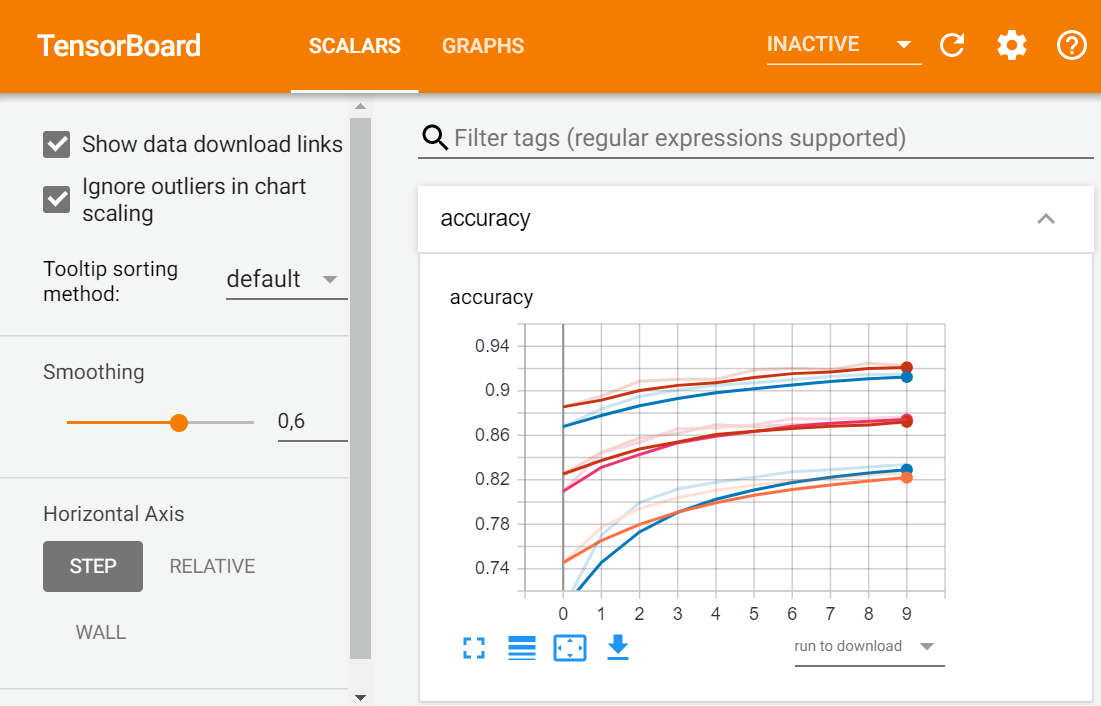

<figcaption class="figure-caption has-text-centered">Figure 1: Screenshot of the TensorBoard interface showing the validation.</figcaption>
</figure>
</div>
## Multilayer Perceptron
This exercise is about training and modifying a multilayer perceptron. The function `train_pytorch_network`
 defined in the cell below should be used for model training. TensorBoard can be used to visualize the results.
<article class="message task"><a class="anchor" id="setup"></a>
    <div class="message-header">
        <span>Task 2: MLP training</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to train the MLP.
2. The evaluation of each model iteration are stored in the `runs`
 directory. Use TensorBoard to visualize the training process.
3. Navigate to the **SCALARS**  tab and inspect the graphs showing model accuracy and loss. What patterns or trends do you observe in the loss and accuracy graphs throughout training?
4. Navigate to the **GRAPHS** tab and inspect the model architecture. How do the connections between layers influence the flow of information in the model architecture?
5. Change the learning rate to 1e-3, and 1e-1. How does the choice of learning rate influence the training times and classification performance?
6. Change the momentum to 0.7 and 0.9. Do the classification metrics indicate that an increase in momentum results in overfitting?
7. Set the batch size to 1 and 512. Does the choice of batch size influence training times and classification performance?



</div></article>



In [0]:
def train_pytorch_network(to_train):

    transform = transforms.ToTensor() ## conversion from PIL image format to torch tensors.

    network = to_train

    trainerNetwork = PyTorchTrainer(
        nn_module=network,
        transform=transform,
        optimizer=optim.SGD(network.parameters(), lr=1e-2, momentum=0.5),
        batch_size=128,
    ) 

    print("training the network started")
    trainerNetwork.train(10)
    trainerNetwork.save()
    print("training and saving the network ended")


train_pytorch_network(MLPBasic())

## Convolutional Neural Network
<article class="message task"><a class="anchor" id="CNN1"></a>
    <div class="message-header">
        <span>Task 3: CNN setup</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Call the `train_pytorch_network`
 function:
1. Swap the `MLPBasic`
 model with the `CNNBasic`
 model, defined in `networks.py`
.
2. Train the CNN by running the modified script.
3. Change the learning rate to 1e-4, and 1e-5.  How does the choice of learning rate influence the training times and classification performance?
4. Change the momentum to 0.3 and 0.1. Do the classification metrics indicate that a decrease in momentum results in overfitting?
5. Set the batch size to 256 and 1024. Does the choice of batch size influence training times and classification performance?



</div></article>



In [0]:
# write your solution here

## Comparing the architectures
<article class="message task"><a class="anchor" id="CNN2"></a>
    <div class="message-header">
        <span>Task 4: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Compare the models by following these steps:
1. Update the paths to the recently trained models in the `models`
 dictionary in the cell below. 

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  The cell contains examples to help you with the syntax. Look in the `./models`
 folder to find the filenames of your trained models.


  </div>
</article>
2. Run the cell below.

3. Examine the confusion matrix, the accuracy plots and the model predictions. How well does the MLP perform on dataset?

4. Copy the code to a new cell and modify rerun it on the `CNN`
 model.

5. Compare the two models with respect to accuracy and predictions and determine which model performs best? Why is this the case?

6. Observe which classes the MLP model has difficulty with. Use the `show_samples`
 function to visualize target classes and predictions and explain what characterizes these classes.




</div></article>



In [0]:
from models import *

models = {
    'MLP': PyTorchTrainer.load('models/MLPBasic-11-29--18-56-09.pkl'), # replace this with your trained model
    'CNN': PyTorchTrainer.load('models/CNNBasic-11-29--19-03-25.pkl'), # replace this with your trained model
}

# Evaluate each model (this may take a while if you have many models)
loggers = {k: v.evaluate() for k, v in models.items()}

classes = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

fig = plt.figure(figsize=(7, 7))
sns.heatmap(loggers['MLP'][0].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, yticklabels=classes, square=True)

acc = [l[0].accuracy for l in loggers.values()]
plt.figure(figsize=(10, 4))
sns.barplot(y=list(models.keys()), x=acc)

# Change .precision to .recall to change metric
ps = {k: v[0].precision for k, v in loggers.items()}
ps = {'class': classes, **ps}

df = pd.DataFrame(ps)
df = df.melt(id_vars='class')

plt.figure(figsize=(10, 4))
sns.barplot(x='class', y='value', hue='variable', data=df)
plt.legend(loc='lower right')

# Choose model (use dict key)
p = loggers['MLP'][1]

# Load test data
X_test, y_test = load_mnist('FashionMNIST/raw', kind='t10k')

# Use display function from the top of the file
show_samples(X_test, y_test, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()

## Modifying the Multilayer Perceptron model
The following exercise will add a hidden layer to the MLP model. The cell below contains the `MLP_modified`
 class.
<article class="message task"><a class="anchor" id="modifications"></a>
    <div class="message-header">
        <span>Task 5: Adding a hidden layer</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


<!-- Here should be some tasks about modifying the networks and observing the changes.  -->
1. Add a new hidden layer with 256 nodes by updating the constructor.
2. Update the `forward`
 method to ensure this new hidden layer is used in the predictions. Ensure that the number of input and output features match between the layers.
3. Train the model and evaluate it using the code from the previous tasks. 
4. Compare the model perfomance the previous model and describe their differences. 
5. Change the number of nodes to 512 (adjust the rest of the layers) and evaluate model performance.



</div></article>



In [0]:
class MLP_modified(nn.Module):
    def __init__(self):
        super().__init__()
         #Define a two layer network archtechture
        self.layer_1 = nn.Linear(784, 100)
        self.layer_2 = nn.Linear(100, 10)

    def forward(self, x):
         #Prediction
         
        #input to vector
        x = torch.flatten(x, start_dim=1)

        #Prediction through first layer and relu activation
        x = self.layer_1(x)
        x = F.relu(x)


        #Prediction through second layer with relu activation
        x = self.layer_2(x)

        return F.relu(x)

## Modifying the CNN
The following exercise will add a convolutional layer to the CNN model given in the cell below.
- The kernel size influences the size of the output image. Specifically, for kernel size $k$, the output has dimensions $w-(k-1) \times h-(k-1)$. Adding a convolutional layer is consequently a bit more tricky than a linear layer because the dimensions between the layers need to match.  You will likely need to debug the model a few times to get it right.
- Convolutional layers MAY be accompanied with a max pooling layer, but remember to use an activation function.
- The `max_pool2d`
 operation in the`forward`
 function halves the image resolution. 

<article class="message task"><a class="anchor" id="modifications2"></a>
    <div class="message-header">
        <span>Task 6: Adding a convolutional layer</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Add a new `Conv2d`
 layer to the `CNN_modified`
 class by decreasing the kernel size of the existing first layer and add the new layer as the second layer.

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  Use `tensor.size`
 to get the size of any tensor.


  </div>
</article>
2. Train the model. 
3. Evaluate model perfomance using the code from previous tasks.
4. Change the kernel size and the number of kernels to achieve the best performing model, while avoiding overfitting.



</div></article>



In [0]:
class CNN_modified(nn.Module):
    """Define a CNN with three covolutional layers and two linear layers
    Args:
        nn (_type_): _description_
    """
    def __init__(self):
        super().__init__()
        #Define network archtechture with three convolutional layers and two linear layers
       
        # 8 kernels each with size 9
        self.conv_1 = nn.Conv2d(1, 8, kernel_size=9) 
       
        # layer that for each of the  8 channels from previous layer
        #  having 16 kernels each of size 3
        self.conv_2 = nn.Conv2d(8, 16, kernel_size=3) 
        self.linear_1 = nn.Linear(4 ** 2 * 16, 60)
        self.linear_2 = nn.Linear(60, 10)

    def forward(self, x):
        #Prediction
        x = F.relu(self.conv_1(x)) #relu activation on the first layer
        x = F.max_pool2d(x, kernel_size=2, stride=2) 

        x = F.relu(self.conv_2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        #make input into one vector
        x = torch.flatten(x, start_dim=1)

        x = self.linear_1(x)
        x = F.relu(x)

        x = self.linear_2(x)

        return x

## Optional task
<article class="message task"><a class="anchor" id="additional"></a>
    <div class="message-header">
        <span>Task 7: Additional improvements <em>(optional)</em></span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights hard"></i>
        </span>
    </div>
<div class="message-body">


Change the activation functions, the number of hidden layers, and the training setup to achieve the best performing model. Notice, that a huge amount of time can be spent on fiddling with the models.


</div></article>

